# CREDIT CARD FRAUD DETECTION DASHBOARD

Financial fraud is a growing problem with long term consequences in the financial industry and
while many techniques have been discovered to solve this problem faced by various companies,
data mining has been successfully applied to finance databases to automate analysis of huge
volumes of complex data. Data mining has also played a salient role in the detection of credit
card fraud in online transactions.
Fraud detection in credit card is a data mining problem. It becomes challenging due to two
major reasons – first, the profiles of normal and fraudulent behaviour change frequently and
second, the credit card fraud data sets are highly skewed.

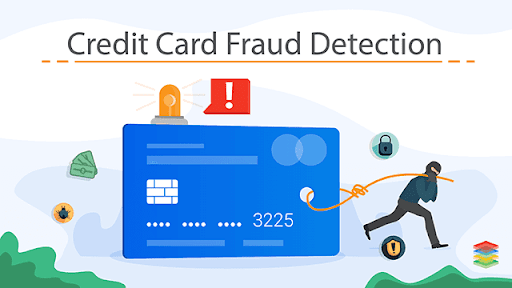

In [2]:
#IMPORTED LIBRARIES

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import dash
import dash_core_components as doc
import dash_html_components as html
from dash.dependencies import Input, Output

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [3]:
app=dash.Dash()
server = app.server

## STEP 1: Exploratory data analysis

### Reading and understanding the dataset

In [4]:
#Loading dataset
dataset = pd.read_csv("creditcard.csv")
dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Number of rows and columns:

In [5]:
dataset.shape

(284807, 31)

### Description of Dataset

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Amount is an important feature we need to focus on

In [7]:
dataset["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Checking for missing values

In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

## Checking the distribution of the classes

#### Genuine --> 0       Fraudulent --> 1

In [9]:
classes = dataset['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

#### Genuine transaction percentage:

In [10]:
normal_share = round((classes[0]/dataset['Class'].count()*100),3)
normal_share

99.827

#### Fraudulent transaction percentage:

In [11]:
fraud_share = round((classes[1]/dataset['Class'].count()*100),3)
fraud_share

0.173

We can see that there is only 0.17% frauds. 

## Visualisation of Labels

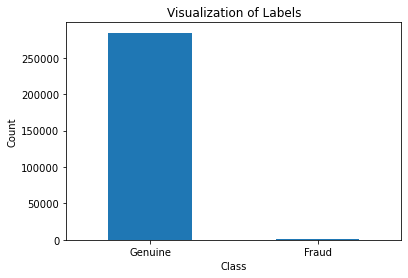

In [12]:
#visualization of the "labels" column in the dataset

import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = dataset.value_counts(dataset['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## Plotting the distributions of all the feature

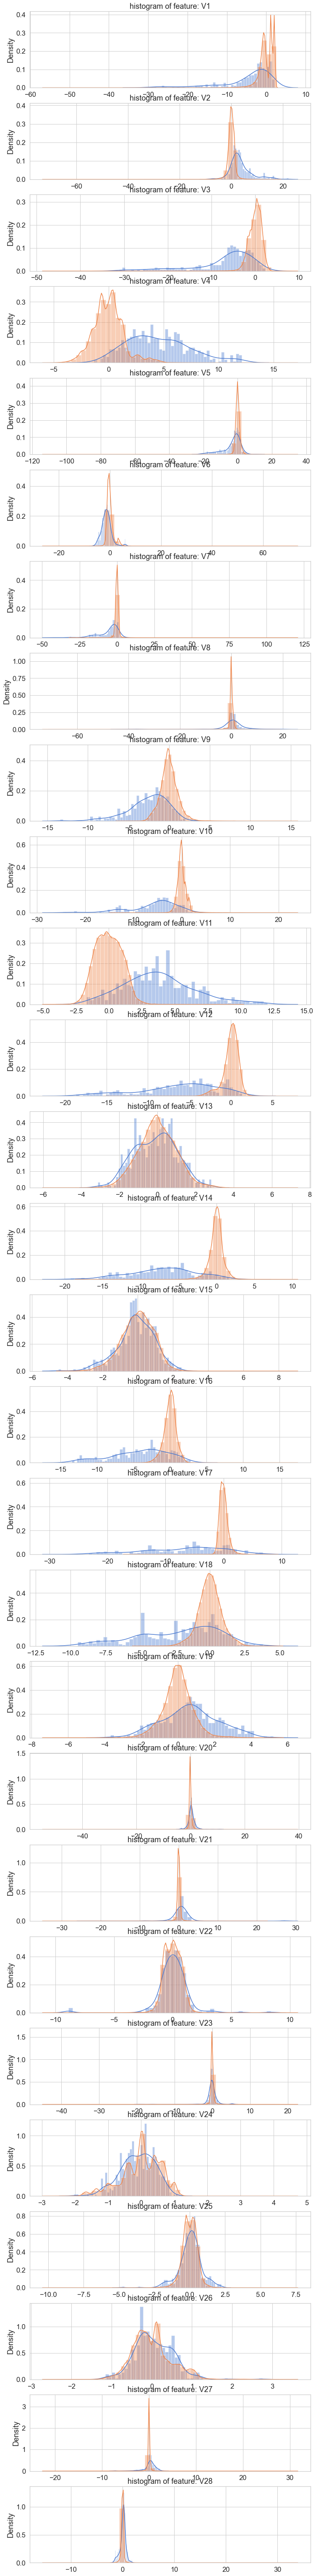

In [52]:
from pylab import rcParams
import matplotlib.gridspec as gridspec
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

#Select only the anonymized features.
features = dataset.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.Class == 1], bins=50)
    sns.distplot(dataset[cn][dataset.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

## The classes are heavily skewed we need to solve this issue later.

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


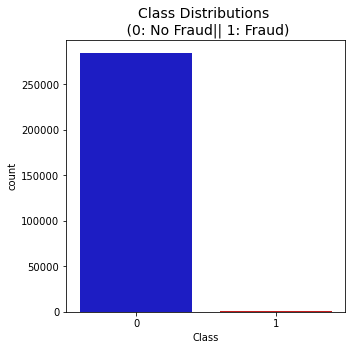

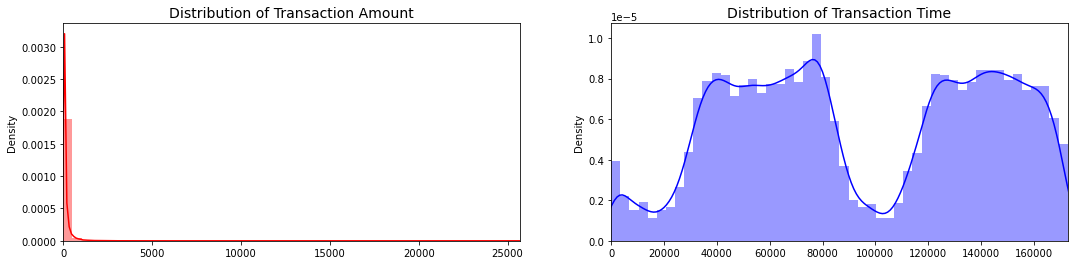

In [13]:
print('No Frauds', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

colors = ["#0101DF", "#DF0101"]

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.countplot('Class',data=dataset, palette=colors)
plt.title('Class Distributions \n (0: No Fraud|| 1: Fraud)', fontsize=14)
  



#Distributions: By seeing the distributions we can have an idea how skewed are these features
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [55]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# RobustScaler is less prone to outliers.
#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)
dataset.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## STEP 2:SPLITTING DATA INTO TRAINING AND TEST SET

In [57]:
print('No Frauds', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

X = dataset.drop('Class', axis=1)
y = dataset[['Class']]


#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]


In [58]:
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


## Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

## Lets shuffle the data before creating the subsamples

In [59]:
dataset = dataset.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = dataset.loc[dataset['Class'] == 1]
non_fraud_df = dataset.loc[dataset['Class'] == 0][:497]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,...,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1.146899,0.040563,-2.365936,1.823478,-3.495462,2.235308,-1.561575,-0.677479,-2.751570,0.265678,...,0.155929,0.383707,0.009933,-0.022673,-0.027241,0.025464,0.022762,0.072937,0.030752,0.497472
std,3.286730,0.566055,5.488324,3.638652,6.211124,3.223166,4.184688,1.772441,5.849219,4.874636,...,1.056302,2.827358,1.192675,1.172458,0.561380,0.664660,0.469723,1.028453,0.446349,0.500247
min,-0.307413,-0.991342,-30.552380,-12.528092,-31.103685,-4.605982,-22.105532,-6.406267,-43.557242,-41.044261,...,-7.192430,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-4.950970,0.000000
25%,-0.284636,-0.452743,-2.790771,-0.160418,-5.074445,-0.154342,-1.763517,-1.565507,-3.065234,-0.200980,...,-0.198819,-0.159387,-0.537110,-0.239303,-0.372216,-0.328496,-0.290893,-0.068409,-0.057843,0.000000
50%,-0.041361,-0.050811,-0.762698,0.951967,-1.367020,1.289616,-0.376561,-0.644147,-0.584163,0.158353,...,0.019123,0.146681,0.044681,-0.027337,0.015803,0.048920,-0.026232,0.045917,0.035132,0.000000
75%,1.089779,0.592089,1.020825,2.773082,0.332014,4.180779,0.464696,0.081160,0.248279,0.919503,...,0.408704,0.632505,0.605330,0.206812,0.399632,0.400924,0.308498,0.423620,0.218690,1.000000
max,42.981625,1.026269,2.364286,22.057729,3.298684,12.114672,11.095089,6.474115,9.295277,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.909181,2.208209,2.745261,5.986798,1.779364,1.000000


## Distribution of the Classes in the subsample dataset

0    0.502528
1    0.497472
Name: Class, dtype: float64


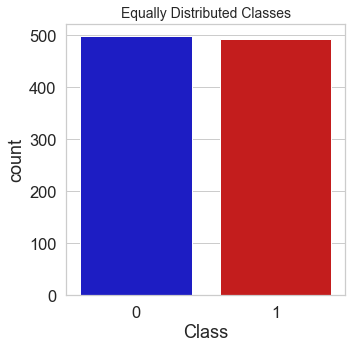

In [61]:
#print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Scatter plots for T-SNE, PCA, TruncatedSVD implementation

T-SNE took 5.2 s
PCA took 0.008 s
Truncated SVD took 0.008 s


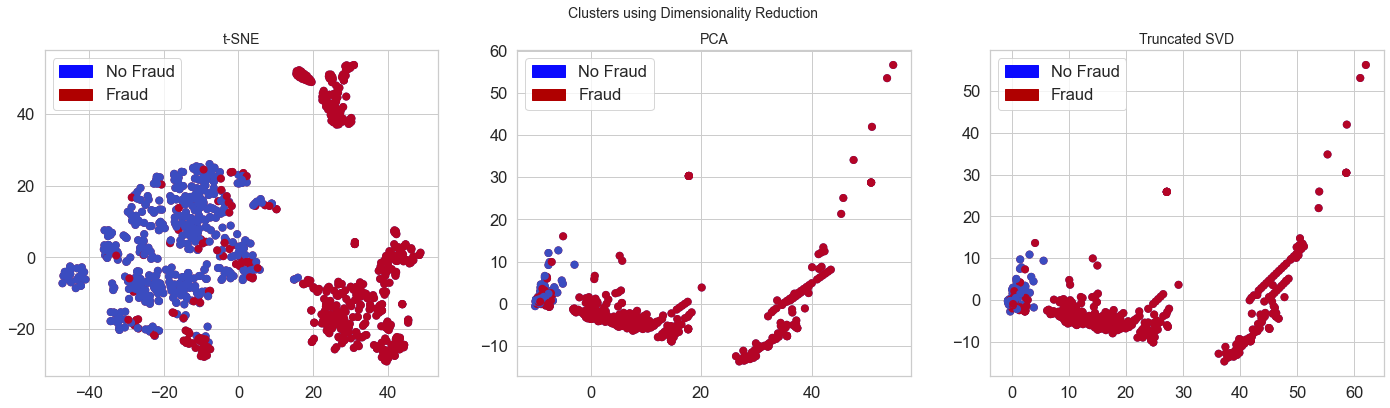

In [62]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plots
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Undersampling before cross validating (prone to overfit)

In [63]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [64]:
def plot_learning_curve(estimator1, X, y,name, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1) = plt.subplots(1,1, figsize=(10,7), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title(str(name)+" Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

## STEP 3:IMPLEMENTING SIMPLE CLASSIFIERS


Classifiers:  RandomForestClassifier
[[ 88   3]
 [  6 101]]


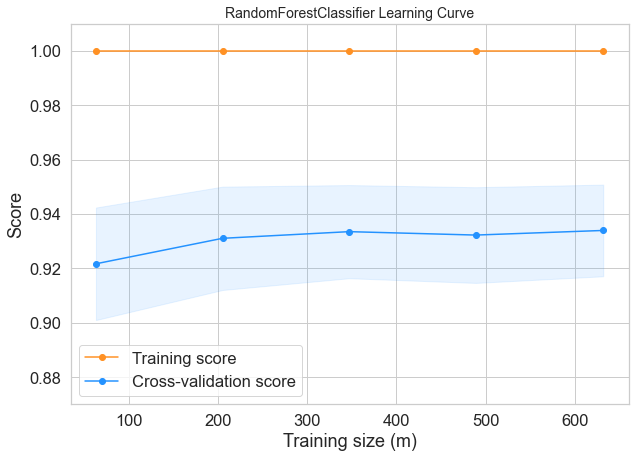

tn, fp, fn, tp
0.4444444444444444 0.015151515151515152 0.030303030303030304 0.51010101010101
specificity: 0.967032967032967
sensitivity: 0.9439252336448598
RandomForestClassifier
accuracy_score: 0.9545454545454546
precision_score: 0.9711538461538461
f1_score: 0.957345971563981

Classifiers:  LogisticRegression
[[ 90   1]
 [  5 102]]


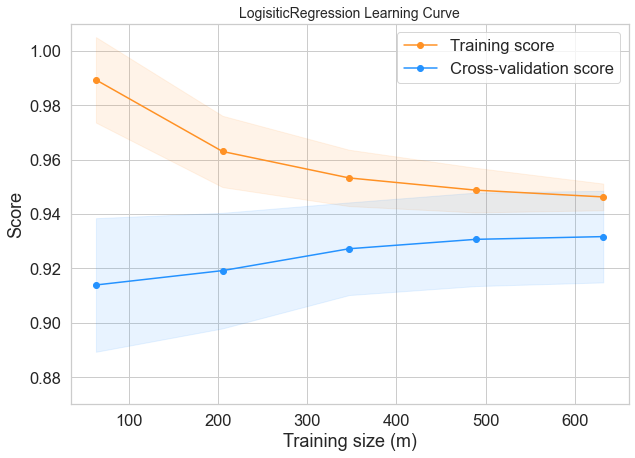

tn, fp, fn, tp
0.45454545454545453 0.005050505050505051 0.025252525252525252 0.5151515151515151
specificity: 0.989010989010989
sensitivity: 0.9532710280373832
LogisiticRegression
accuracy_score: 0.9696969696969697
precision_score: 0.9902912621359223
f1_score: 0.9714285714285714

Classifiers:  KNeighborsClassifier
[[89  2]
 [ 9 98]]


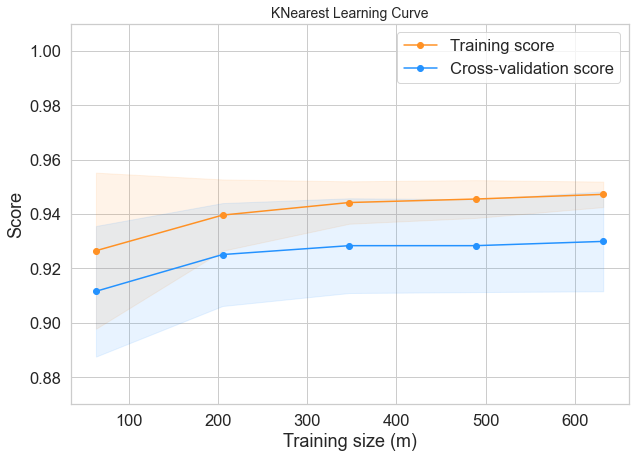

tn, fp, fn, tp
0.4494949494949495 0.010101010101010102 0.045454545454545456 0.494949494949495
specificity: 0.978021978021978
sensitivity: 0.9158878504672897
KNearest
accuracy_score: 0.9444444444444444
precision_score: 0.98
f1_score: 0.9468599033816426

Classifiers:  SVC
[[90  1]
 [10 97]]


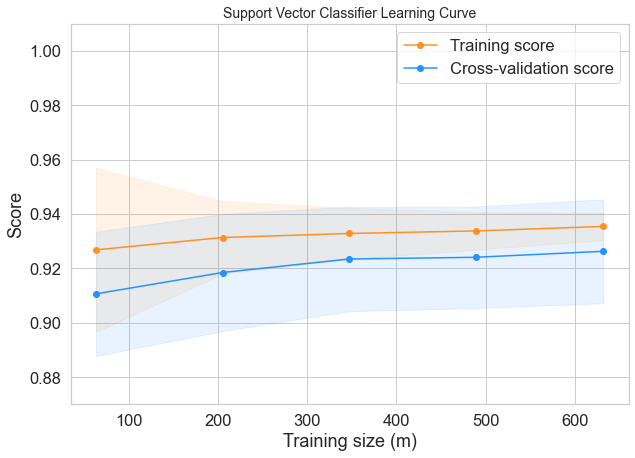

tn, fp, fn, tp
0.45454545454545453 0.005050505050505051 0.050505050505050504 0.4898989898989899
specificity: 0.989010989010989
sensitivity: 0.9065420560747663
Support Vector Classifier
accuracy_score: 0.9444444444444444
precision_score: 0.9897959183673469
f1_score: 0.9463414634146342

Classifiers:  DecisionTreeClassifier
[[78 13]
 [ 8 99]]


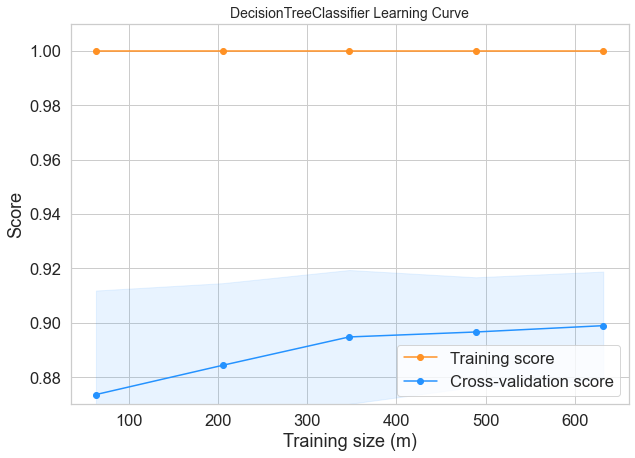

tn, fp, fn, tp
0.3939393939393939 0.06565656565656566 0.04040404040404041 0.5
specificity: 0.8571428571428571
sensitivity: 0.9252336448598131
DecisionTreeClassifier
accuracy_score: 0.8939393939393939
precision_score: 0.8839285714285714
f1_score: 0.9041095890410958


In [69]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#import collections

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
   #"XGBClassifier":XGBClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    #metrics
    print("\nClassifiers: ", classifier.__class__.__name__)
    cm=confusion_matrix(y_test, y_pred)
    print(cm)
    
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
    x=plot_learning_curve(classifier, X_train, y_train,key, (0.87, 1.01), cv=cv, n_jobs=4)
    x.show()
    f1=f1_score(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    pr=precision_score(y_test, y_pred)
    print("tn, fp, fn, tp")
    t=tp+tn+fn+fp
    print(tn/t, fp/t, fn/t, tp/t)
    print("specificity: "+str(tn/(tn+fp)))
    print("sensitivity: "+str(tp/(tp+fn)))
    print(key)
    print("accuracy_score:",acc)
    print("precision_score:",pr)
    print("f1_score:",f1)

>RANDOM FOREST

accuracy_score: 0.95

precision_score: 0.97

>LOGISTIC REGRESSION

accuracy_score: 0.97

precision_score: 0.99

>K NEAREST

accuracy_score: 0.94

precision_score: 0.98

>SUPPORT VECTOR

accuracy_score: 0.94

precision_score: 0.99

>DECISION TREE

accuracy_score: 0.89

precision_score: 0.88

From the above statistic we can say that logistic regression has highest accuracy followed by random forest, k nearest, support vector and decision tree

## CONCLUSION

Although there are several fraud detection techniques available today, none is able to
detect all frauds completely when they are actually happening, they usually detect it after the
fraud has been committed. This happens because a very minuscule number of transactions from
the total transactions are actually fraudulent in nature. So we need a technology that can detect
the fraudulent transaction when it is taking place so that it can be stopped then and there and
that too in a minimum cost. So the major task of today is to build an accurate, precise and fast
detecting fraud detection system for credit card frauds that can detect not only frauds happening
over the internet like phishing and site cloning but also tampering with the credit card itself i.e.
it signals an alarm when the tampered credit card is being used. The major drawback of all the
techniques is that they are not guaranteed to give the same results in all environments. They
give better results with a particular type of dataset and poor or unsatisfactory results with other
type. Thus, the results are purely dependent on the dataset type used.